# **Data Diri**


*   NIM = 2241720056
*   Nama = Dhika Wahyu Nugroho
*   Kelas = 3F
*   No Absen = 06




# **Tugas 1**



> Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.



## **Langkah 1 - Load Library**

In [193]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## **Langkah 2 - Unduh Dataset CIFAR**

In [194]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## **Langkah 3 - Verifikasi Data**

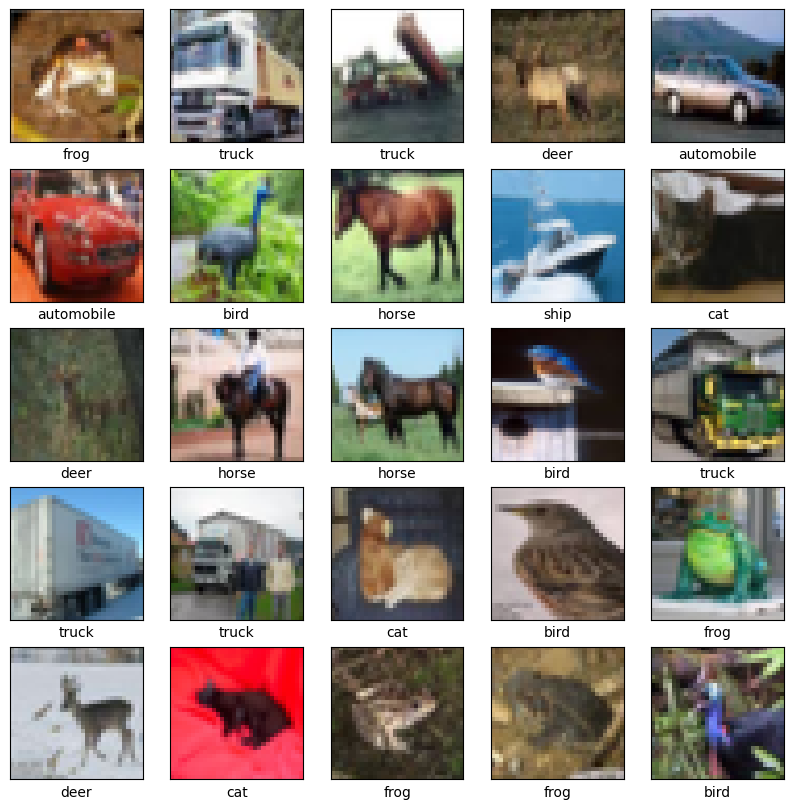

In [195]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## **Langkah 4 - Buat Model CNN**

### **Langkah 4.1. - Buat Layer Konvolusi**

In [196]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

### **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [197]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_90 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_91 (Conv2D)          (None, 16, 16, 64)      

### **Langkah 4.3. - Tambahkan Layer Fully Connected**

In [198]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

### **Langkah 4.4. - Cek Arsitektur Model CNN**

In [199]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_90 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_91 (Conv2D)          (None, 16, 16, 64)      

### **Langkah 4.5. - Compile Model CNN**

In [200]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Langkah 5 - Fit Model**

In [207]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler])

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5591 - accuracy: 0.8082 - val_loss: 0.5487 - val_accuracy: 0.8192 - lr: 0.0010
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.5387 - accuracy: 0.8140 - val_loss: 0.5791 - val_accuracy: 0.8141 - lr: 0.0010
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5203 - accuracy: 0.8186 - val_loss: 0.6179 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.4961 - accuracy: 0.8299 - val_loss: 0.6620 - val_accuracy: 0.7920 - lr: 0.0010
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4092 - accuracy: 0.8585 - val_loss: 0.4879 - val_accuracy: 0.8405 - lr: 5.0000e-04
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.3802 - accuracy: 0.8671 - val_loss: 0.5629 - val_accuracy: 0.8313 - lr: 5.0000e-04
Epoch 7/10
1563/1563 [================

## **Langkah 6 - Evaluasi Model**

313/313 - 3s - loss: 0.5053 - accuracy: 0.8475 - 3s/epoch - 9ms/step


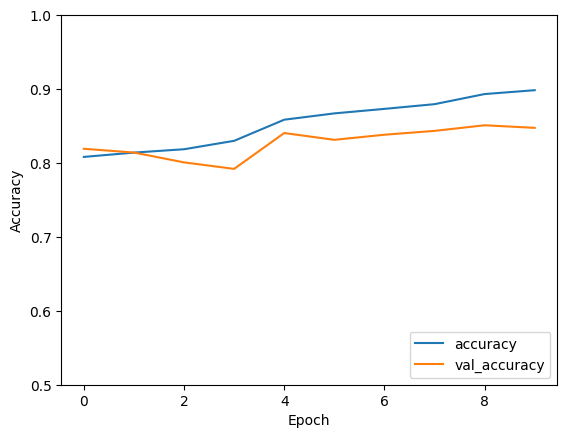

In [208]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## **Langkah 7 - Cetak Hasil Akurasi**

In [209]:
print(test_acc)

0.8475000262260437


# **Tugas 2**



> Buatlah model CNN untuk klasifikasi dataset MNIST.



## **Import**

In [211]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## **Load Data**

In [212]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mencetak bentuk dataset sebelum pemrosesan
print(f'Bentuk x_train sebelum reshape: {x_train.shape}')
print(f'Bentuk y_train sebelum one-hot encoding: {y_train.shape}')

11490434/11490434 [==============================] - 0s 0us/step
Bentuk x_train sebelum reshape: (60000, 28, 28)
Bentuk y_train sebelum one-hot encoding: (60000,)


In [213]:
# Normalisasi dan reshape data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [214]:
# One-hot encoding label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Mencetak bentuk dataset setelah pemrosesan
print(f'Bentuk x_train setelah reshape: {x_train.shape}')
print(f'Bentuk y_train setelah one-hot encoding: {y_train.shape}')
print(f'Bentuk x_test setelah reshape: {x_test.shape}')
print(f'Bentuk y_test setelah one-hot encoding: {y_test.shape}')

Bentuk x_train setelah reshape: (60000, 28, 28, 1)
Bentuk y_train setelah one-hot encoding: (60000, 10)
Bentuk x_test setelah reshape: (10000, 28, 28, 1)
Bentuk y_test setelah one-hot encoding: (10000, 10)


## **Model CNN**

In [215]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [216]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_96 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_20 (Flatten)        (None, 1600)              0         
                                                                 
 dense_40 (Dense)            (None, 64)              

In [217]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## **Model Training**

In [218]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 7s 9ms/step - loss: 0.1954 - accuracy: 0.9408 - val_loss: 0.0767 - val_accuracy: 0.9768
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0581 - accuracy: 0.9818 - val_loss: 0.0524 - val_accuracy: 0.9840
Epoch 3/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0518 - val_accuracy: 0.9864
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0470 - val_accuracy: 0.9866
Epoch 5/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0451 - val_accuracy: 0.9873


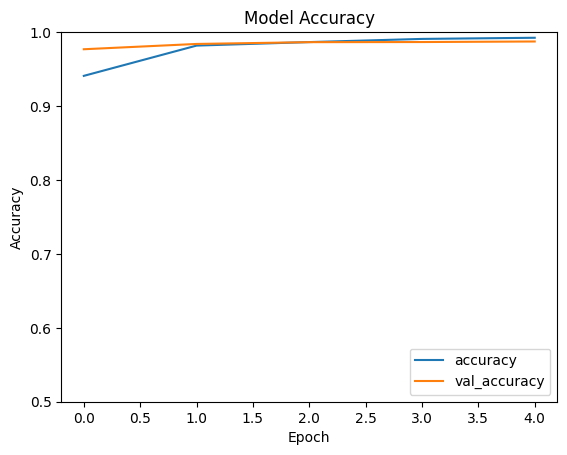

In [219]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()